## Assignment 1:
### Generate 100 samples of different sizes N (N>10 & N<2000)from each of 5 different distributions (500 samples in total), all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice. For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). Describe the behavior you see in the plots in terms of the law of large numbers. PLOT the distributions of all sample means (together for all distributions).  Mandatory: as a histogram. Optional: in any other way you think is convincing.Extra Credit: FIT a gaussian to the distribution of means

In [49]:
from __future__ import print_function
__author__='Chunqing Xu CUSP 2016'

import pylab as pl
from scipy.optimize import curve_fit, minimize
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Chi Sq Distribution

In [50]:
np.random.chisquare?

In [51]:
distributions = ['chisq']

In [52]:
mymean = 100

In [53]:
df = mymean

In [54]:
md = {}
md['chisq'] = np.random.chisquare(df,size=100)
md

{'chisq': array([ 104.70040113,  108.26434622,   84.34150638,  108.90464112,
          99.62435507,   77.7813959 ,  103.58384518,   77.25288008,
          82.21977123,  103.56405759,   95.33934765,  111.8628662 ,
          97.89048406,  131.06167443,   83.46795267,  104.78961624,
         131.35780624,  108.43912796,   86.89473158,   90.19791761,
         100.80711478,  114.8009239 ,  104.91480051,  103.83101641,
          88.96239476,   90.62932555,  105.66450801,   81.70354796,
         105.8048331 ,   93.20719327,  100.48318922,   98.90260131,
         117.80268585,  108.13923513,   91.52223306,   81.30387807,
          84.03362831,  108.99268149,   99.51978567,  111.20465739,
          99.14417855,   94.34165775,   74.58880673,  120.71319786,
          92.38396257,   98.6586488 ,   81.47212286,  121.34688512,
         120.01526799,   99.30674131,   91.79554402,  103.6086188 ,
         100.82018801,  100.76147954,   89.75824427,   79.26492013,
         114.02943719,  106.51468966,  

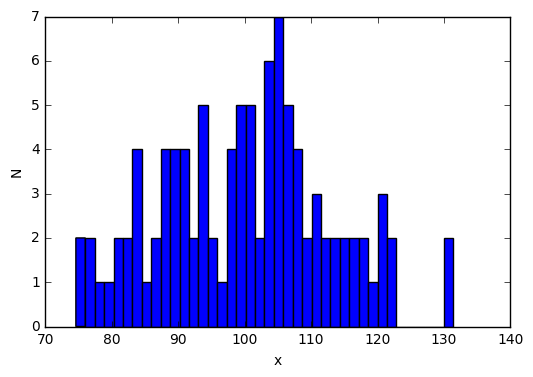

In [55]:
pl.hist(md['chisq'], bins=40)
pl.ylabel('N')
pl.xlabel('x')

## Figure 1: Chi sq distribution:df = 100, N = 100

In [56]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.06, standard deviation: 12.66


In [57]:
mysize = np.linspace(10, 2000, 100).astype(int)
print (mysize, mysize.shape)

[  10   30   50   70   90  110  130  150  170  190  211  231  251  271  291
  311  331  351  371  391  412  432  452  472  492  512  532  552  572  592
  613  633  653  673  693  713  733  753  773  793  814  834  854  874  894
  914  934  954  974  994 1015 1035 1055 1075 1095 1115 1135 1155 1175 1195
 1216 1236 1256 1276 1296 1316 1336 1356 1376 1396 1417 1437 1457 1477 1497
 1517 1537 1557 1577 1597 1618 1638 1658 1678 1698 1718 1738 1758 1778 1798
 1819 1839 1859 1879 1899 1919 1939 1959 1979 2000] (100,)


In [58]:
md['chisq'] = {}
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
md['chisq']

{10: array([ 103.89920831,   99.59708007,   74.63514008,  118.76644344,
          85.40980577,  108.34165153,   99.55803983,  125.442451  ,
         116.2093845 ,   99.40041833]),
 30: array([ 101.68230071,   82.89718552,  100.30531482,   85.38452412,
          87.55908848,   99.25391093,   95.61017771,  101.90783849,
          88.73498102,  102.86028063,  114.36619269,   91.43027629,
         110.22973841,   86.26353339,  112.16234827,   92.76583892,
         105.90313943,   74.56866522,   85.07110411,  106.06239079,
         110.91702718,  103.4865752 ,   84.01033515,   98.65657454,
         102.26505194,   85.65394415,  103.91296751,  112.60058937,
         103.8760717 ,   98.60393968]),
 50: array([ 106.30502052,   86.73592725,   93.20258315,   80.98642134,
          84.92970836,  110.56008394,   89.60831714,  121.60330093,
          75.37084546,   87.84250805,  110.69015716,  105.92862421,
         100.13104437,   86.27357823,   92.58514718,   97.80242416,
          75.06546382,  

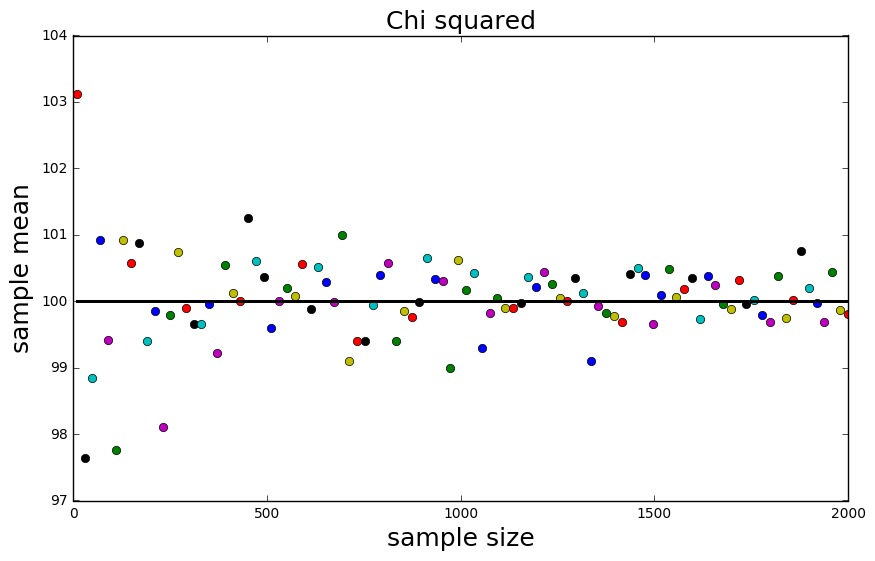

In [59]:

    
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)



for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

## Figure 2: from the figure we can see the sample mean is getting close to 100, which is the mean of the chi square distribution we set before, as the sample size is getting larger. It is in accord with the law of large numbers.

[99.591484505799826, 100.4879540036501, 103.12596228475236, 100.41780030771361, 100.00493034465407, 100.06012160718986, 97.633396879534246, 99.298309174614843, 100.20356373541755, 100.18977504171421, 98.837011637617067, 99.825275073198569, 100.07433384811712, 100.35423530314741, 100.92316168299034, 100.04587963299464, 100.553062583331, 99.729172138881765, 99.418781796482065, 99.90293920692649, 99.885110036563134, 100.37402950572772, 97.758663271262179, 99.890807809035451, 100.51032095618891, 100.24525178234379, 100.9156608652992, 99.967165131079895, 100.28574449289606, 99.953127036705695, 100.58027516546021, 100.36519682827634, 99.981227333413415, 99.885833802170353, 100.87845259316575, 100.21180595107309, 100.99030531975704, 100.32590723104316, 99.39573853697776, 100.44103183089771, 99.105013720332735, 99.957211530818554, 99.858242462989622, 100.25429083443696, 99.405767183155987, 100.01355107709389, 98.107091361450557, 100.05544751757179, 99.408416231405994, 99.789323810778711, 99.79

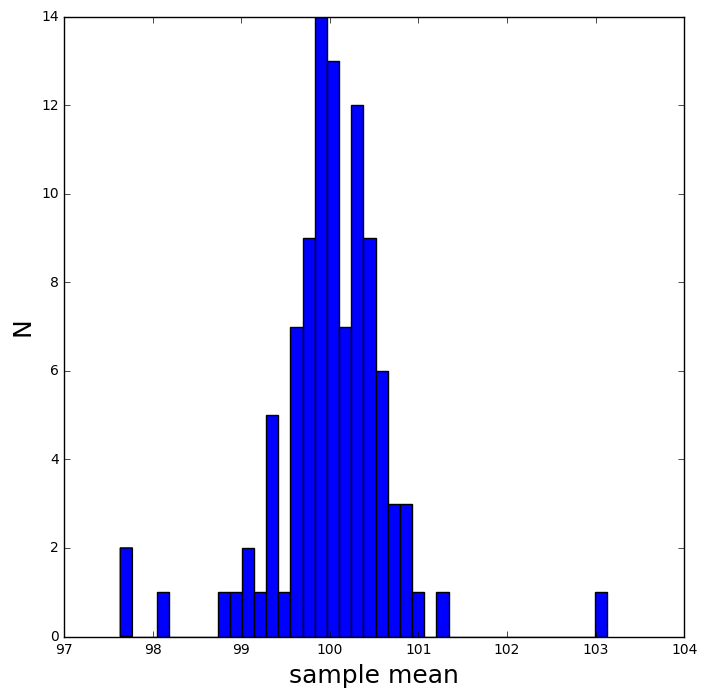

In [60]:
allmeans = list(md['chisq']['means'].values())
chi_means = allmeans
print (allmeans)
pl.figure(figsize=(8, 8))
pl.hist(allmeans,bins=40)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: From the distribution figure of sample means, we can see it is closed to a normal distribution.  According to the Central Limit Theorem, the distribution of the mean of a large number of independent,  identically distributed variables will be approximately normal, we conclude our experiment is in compliance with Central Limit Theorem.

## 2. Normal Distribution

In [61]:
distributions = ['normal']

In [62]:
np.random.normal?

In [63]:
loc = mymean
# In normal distribution, the loc equals to the mean!

In [64]:
md = {}
md['normal'] = np.random.normal(loc, scale=100, size=100)
md['normal']

array([ 287.01237339,  110.64326257,  -14.95805485,  133.5883523 ,
        168.29471107,  128.9000774 ,  200.96622086,  -20.60687867,
         19.69349721,  111.04765234,  -34.30538845,  227.49191581,
         15.16606211,    9.47286835,  200.58991982,   77.85200694,
       -127.53348933,  156.1120092 ,  118.73023189,  128.34337812,
        -32.45943067,   32.30947016,   77.94522728,  -34.44081565,
        144.97719626,  109.34077465,   72.96368286,  113.81490742,
         28.34198855,   51.77263086,   87.43557853,  242.15181519,
        199.90897693,   77.30589176,   30.60145824,   -6.97802179,
         -8.31124481,  113.66948337,   57.21837353,   59.41155059,
         36.49702226,  184.32520337,  163.13933955,  417.74007755,
         18.22850829,   54.5804199 ,  157.76083344,   70.51953478,
        -56.81506573,  131.72070306,  267.04801678,   66.87355572,
        199.79311649,  -19.26408234,  147.01145109,   39.2288945 ,
        -35.28357964,  134.35724742,  179.98824708,  215.25845

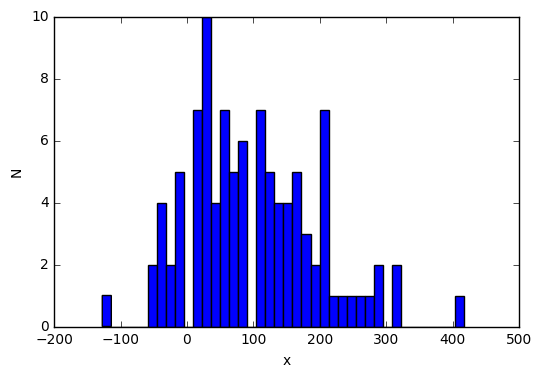

In [65]:
pl.hist(md['normal'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

##  Figure 1: Normal distribution: loc=100, scale=100, N=100

In [66]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['normal'].mean(), md['normal'].std()))

Normal mean: 99.04, standard deviation: 96.01


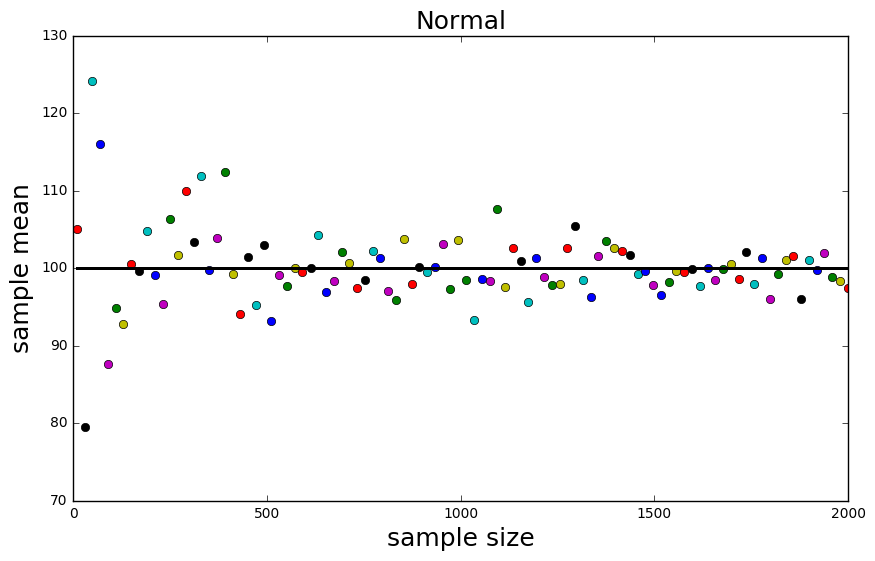

In [67]:
md['normal'] = {} 

for n in mysize:
    md['normal'][n] = np.random.normal(loc, scale = 100, size = n)
       

md['normal']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [loc,loc], 'k')
        

##  Figure 2: from the figure we can see the sample mean is getting close to 100, which is the mean of the normal distribution we set before, as the sample size is getting larger. It is in accord with the law of large numbers.

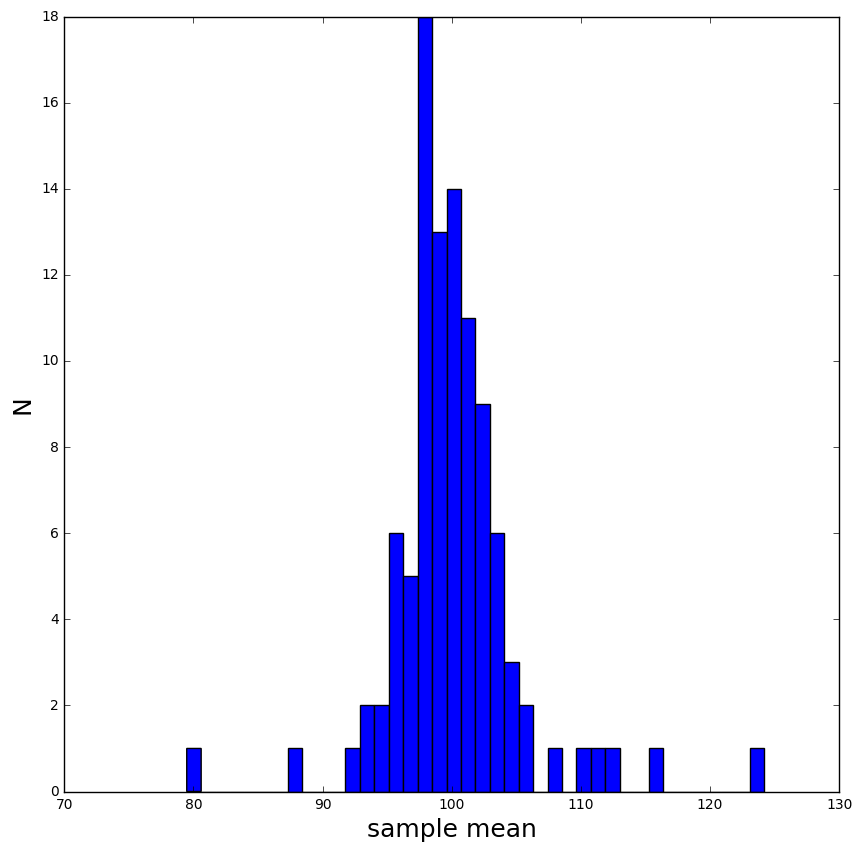

In [68]:
allmeans = list(md['normal']['means'].values())
nor_means = allmeans
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=40)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: From the distribution figure of sample means, we can see it is closed to a normal distribution.  According to the Central Limit Theorem, the distribution of the mean of a large number of independent,  identically distributed variables will be approximately normal, we conclude our experiment is in compliance with Central Limit Theorem.

## 3 Poisson Distribution

In [69]:
distributions = ['poisson']

In [70]:
np.random.poisson?

In [71]:
lam = mymean
# In poisson distribution, the lam equals to the mean!
md = {}
md['poisson'] = np.random.poisson(lam, size=100)
md['poisson']

array([ 91, 101, 101,  83, 115,  83,  94,  99, 109,  92, 102, 107, 104,
        99, 118,  99,  85, 100, 120, 105,  91, 109,  92, 112,  96,  99,
        92, 112,  91,  96,  97, 113, 103, 102, 113,  97,  84,  97, 107,
        81, 111,  79,  97, 112, 110, 103, 106,  88, 127,  94, 110, 112,
       104, 122, 103,  90, 114, 122, 104,  93,  98,  87, 114, 108,  94,
       108,  85,  95,  94, 107,  98, 108,  92, 106, 113, 119,  83,  94,
        86, 107, 101, 105, 106,  95,  87,  99,  87, 102, 104, 127,  93,
       114, 107, 100, 102, 106, 116, 102,  93, 112])

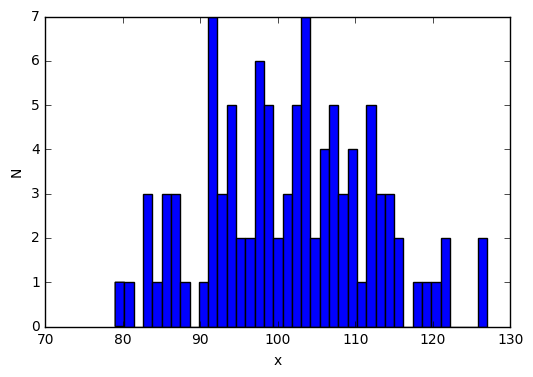

In [72]:
pl.hist(md['poisson'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

##  Figure 1: Poisson distribution: lam=100, N=100

In [73]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['poisson'].mean(), md['poisson'].std()))

Poisson mean: 101.46, standard deviation: 10.54


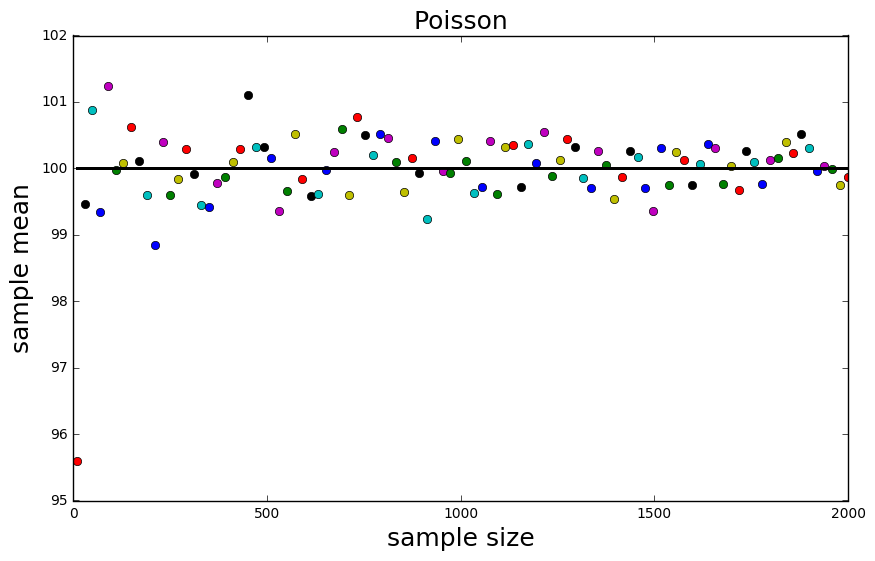

In [74]:
md['poisson'] = {} 

for n in mysize:
    md['poisson'][n] = np.random.poisson(lam, size = n)
       

md['poisson']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [lam,lam], 'k')
        

## Figure 2: from the figure we can see the sample mean is getting close to 100, which is the mean of the poisson distribution we set before, as the sample size is getting larger. It is in accord with the law of large numbers.

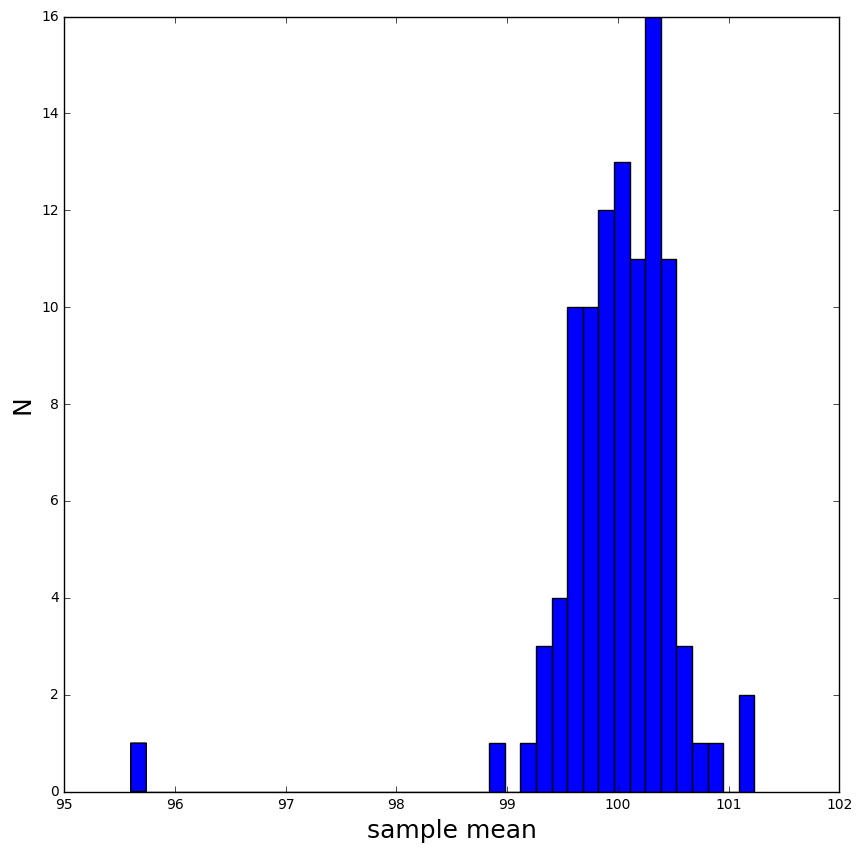

In [75]:
allmeans = list(md['poisson']['means'].values())
poi_means = allmeans
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=40)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: From the distribution figure of sample means, we can see it is closed to a normal distribution.  According to the Central Limit Theorem, the distribution of the mean of a large number of independent,  identically distributed variables will be approximately normal, we conclude our experiment is in compliance with Central Limit Theorem.

## 4. Binomial Distribution

In [76]:
distributions = ['binomial']

In [77]:
np.random.binomial?

In [78]:
n = 1000
p = 0.1
# In binomial distribution, the result of n*p equals to the mean!
md = {}
md['binomial'] = np.random.binomial(n, p, size=100)
md['binomial']

array([ 97, 100, 102, 103, 112,  88, 103, 114,  91, 121,  99, 105,  96,
        96,  99, 110, 103, 109, 106,  95,  98,  92, 102,  95,  94,  91,
        96, 100,  99, 104, 113, 103, 101, 104,  87,  98,  91, 111, 110,
       120,  93, 101, 108,  89, 101,  89, 113,  85,  89,  99, 102, 111,
       115, 113,  98, 118,  93,  98, 115, 107, 116,  92, 112,  86,  96,
       105, 110, 108, 111, 100,  94,  89, 104, 101,  82,  90,  95,  98,
        94,  95, 104,  97, 102,  89, 109,  93,  95, 102, 106, 117, 106,
       105,  96,  90, 100, 124,  98, 105, 107,  93])

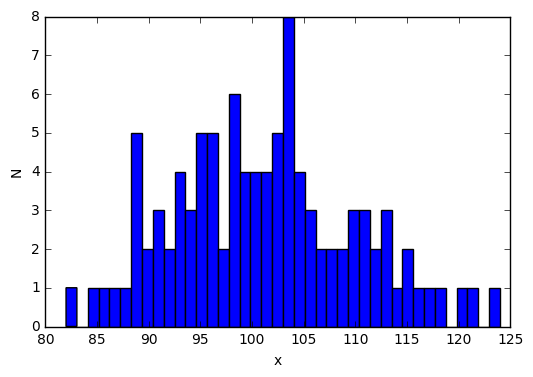

In [79]:
pl.hist(md['binomial'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

##  Figure 1: Normal distribution: n=1000, p=0.1, N=100

In [80]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 101.11, standard deviation: 8.82


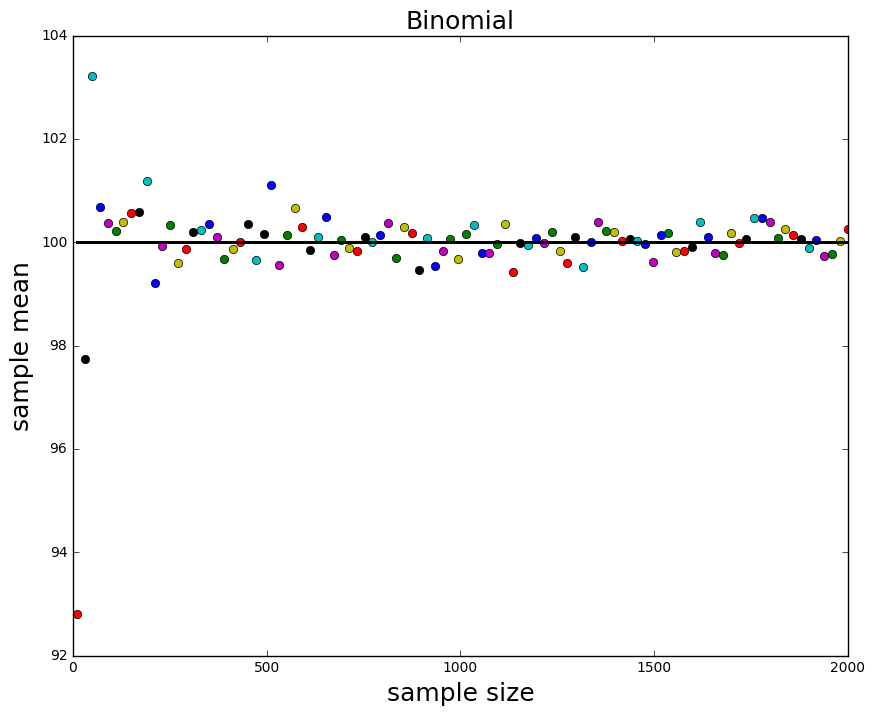

In [81]:
md['binomial'] = {} 

for x in mysize:
    md['binomial'][x] = np.random.binomial(n, p, size = x)
       

md['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,8)).add_subplot(111)

for xx in md['binomial']:
    if not type(xx) == str:
        md['binomial']['means'][xx] = md['binomial'][xx].mean()
        
        axchisq_mu_n.plot(xx, md['binomial']['means'][xx], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [n*p,n*p], 'k')

## Figure 2: from the figure we can see the sample mean is getting close to 100, which is the mean of the poisson distribution we set before, as the sample size is getting larger. It is in accord with the law of large numbers.

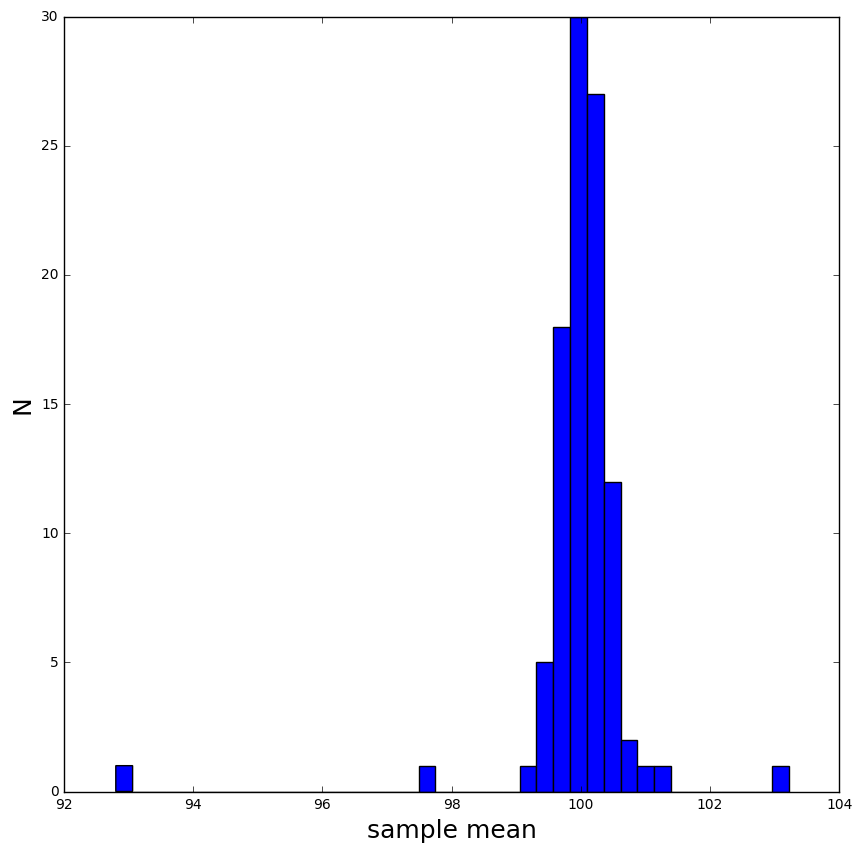

In [82]:
allmeans = list(md['binomial']['means'].values())
bin_means = allmeans
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=40)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: From the distribution figure of sample means, we can see it is closed to a normal distribution.  According to the Central Limit Theorem, the distribution of the mean of a large number of independent,  identically distributed variables will be approximately normal, we conclude our experiment is in compliance with Central Limit Theorem.

## 5. Exponential Distribution

In [83]:
distributions = ['exponential']

In [84]:
np.random.exponential?

In [85]:
scale=100
md = {}
md['exponential'] = np.random.exponential(scale, size=100)
md['exponential']

array([  2.17996852e+02,   1.99040407e+01,   1.35607579e+01,
         3.77991448e+01,   1.10279526e+02,   2.80854469e+02,
         7.99699420e+01,   7.99891445e+01,   2.77680291e+00,
         6.70920523e+01,   1.22896061e+02,   1.10032345e+01,
         8.67685291e+00,   2.27133058e+02,   3.72266210e+01,
         4.27099994e+01,   2.59247439e+01,   6.13539239e+01,
         2.73787342e+01,   4.90091887e+01,   7.61098371e+01,
         4.94687154e+01,   9.86162093e+01,   4.25068258e+01,
         1.96312136e+01,   1.71426226e+00,   3.67045696e+02,
         5.89733695e+00,   4.10741057e+02,   2.17519781e+01,
         2.61519197e+02,   7.95241420e+00,   6.58397488e+01,
         1.90807873e+02,   2.27723261e+01,   9.08861241e+01,
         2.02245895e+02,   6.80432088e+01,   3.18517991e+01,
         2.41573372e+02,   3.04228141e+01,   8.18205760e+01,
         1.53752612e+02,   4.64702008e+01,   2.40170510e+02,
         1.27794080e+01,   3.19542398e+01,   2.89158632e+00,
         6.38299151e+01,

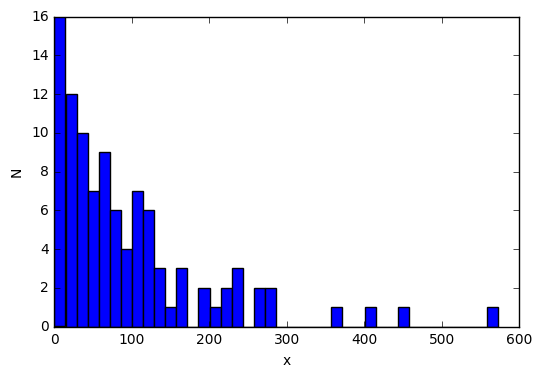

In [86]:
pl.hist(md['exponential'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')

In [87]:
print ("Exponential mean: %.2f, standard deviation: %.2f"%(md['exponential'].mean(), md['exponential'].std()))

Exponential mean: 96.99, standard deviation: 102.79


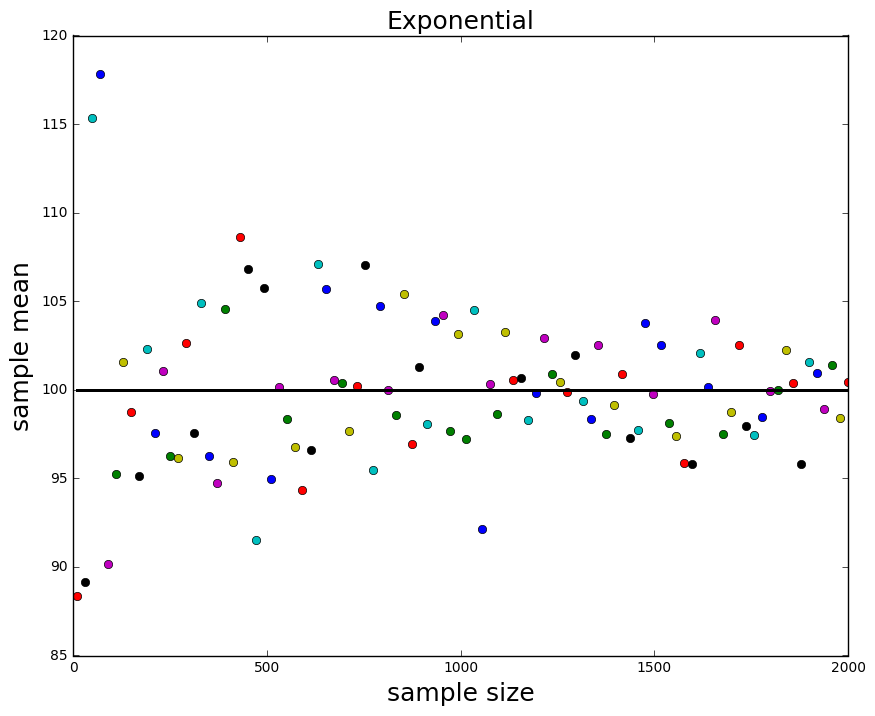

In [88]:
md['exponential'] = {} 

for x in mysize:
    md['exponential'][x] = np.random.exponential(scale, size = x)
       

md['exponential']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,8)).add_subplot(111)

for xx in md['exponential']:
    if not type(xx) == str:
        md['exponential']['means'][xx] = md['exponential'][xx].mean()
        axchisq_mu_n.plot(xx, md['exponential']['means'][xx], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Exponential', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [scale,scale], 'k')

## Figure 2: from the figure we can see the sample mean is getting close to 100, which is the mean of the poisson distribution we set before, as the sample size is getting larger. It is in accord with the law of large numbers.

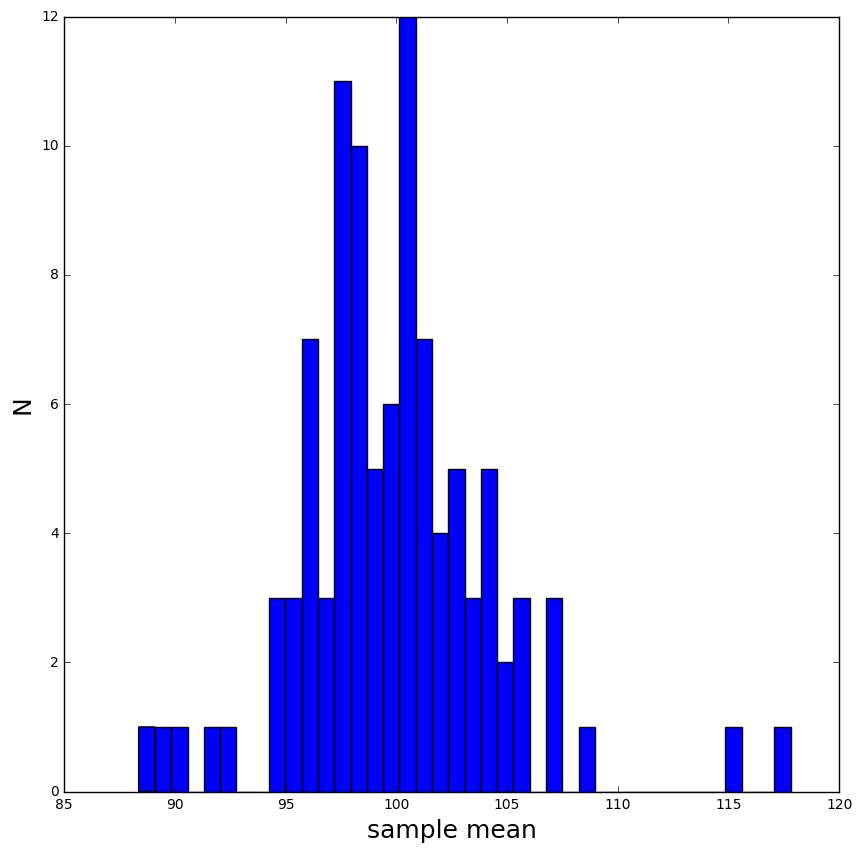

In [89]:
allmeans = list(md['exponential']['means'].values())
exp_means = allmeans
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=40)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: From the distribution figure of sample means, we can see it is closed to a normal distribution.  According to the Central Limit Theorem, the distribution of the mean of a large number of independent,  identically distributed variables will be approximately normal, we conclude our experiment is in compliance with Central Limit Theorem.

## Extra Credit

In [90]:
Allmeans = chi_means + nor_means + poi_means + bin_means + exp_means

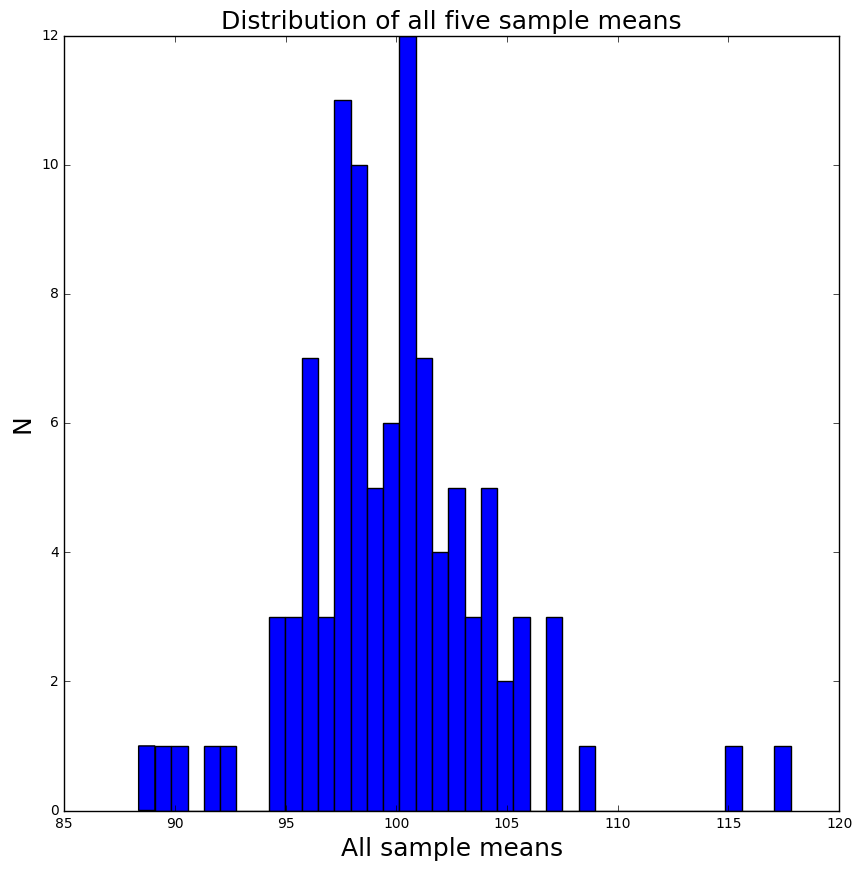

In [91]:
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=40)
pl.xlabel('All sample means', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Distribution of all five sample means', fontsize=18)

## Figure EC: From the figure we can tell that all sample means of these five distributions are fitted in a gaussian distribution, in accord with  Central Limit Theorom.